# Google PageRank

In [ ]:
import numpy as np
import numpy.linalg as la
import networkx as nx
import matplotlib.pyplot as plt

## Preamble: eigenvalues and eigenvectors


 Diagonal 
Eigenvalues: [1. 2.]
Eigenvectors:
[[1. 0.]
 [0. 1.]]


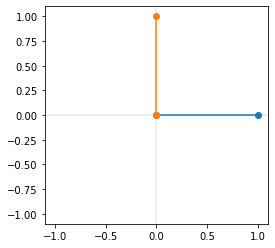


 Skewed 
Eigenvalues: [1. 2.]
Eigenvectors:
[[0.         0.70710678]
 [1.         0.70710678]]


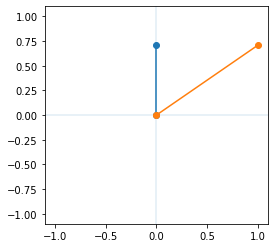


 Rotated 
Eigenvalues: [2. 0.]
Eigenvectors:
[[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]


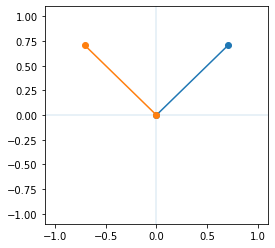

In [ ]:
def eig(title, M):
  l, v = la.eig(M)
  print(f"\n {title} ")
  print("="*(len(title)+2))
  print(f"Eigenvalues: {l}")
  print(f"Eigenvectors:\n{v}")
  plt.figure(figsize=(4, 4))
  for i in range(len(v)):
    plt.xlim((-1.1, 1.1))
    plt.ylim((-1.1, 1.1))
    plt.axvline(0, lw=0.1)
    plt.axhline(0, lw=0.1)
    plt.plot([0, v[i, 0]], [0, v[i, 1]], '-o')
  plt.show()

# diagonale
eig("Diagonal", [[1, 0],
                 [0, 2]])

# skewed
eig("Skewed", [[2, 0],
               [1, 1]])

# rotation
eig("Rotated", [[1, -1],
                [-1, 1]])

## Example graph

Let us create and visualize a connectivity graph.

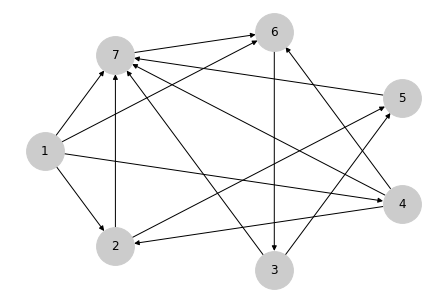

In [ ]:
A = np.array([
    [0, 0, 0, 0, 0, 0, 0],
    [1, 0, 0, 1, 0, 0, 0],
    [0, 0, 0, 0, 0, 1, 0],
    [1, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 0, 0, 0, 0],
    [1, 0, 0, 1, 0, 0, 0],
    [1, 1, 1, 1, 1, 1, 0]
])

def plot_graph(A, node_size=1/A.shape[0], node_color="#ccc"):
    g = nx.from_numpy_matrix(A.T, create_using=nx.DiGraph())
    nx.draw_shell(g, labels=dict((i, str(i+1)) for i in g.nodes), arrows=True,
                     node_size=10000*node_size, node_color=node_color)
plot_graph(A)

We normalize the adjacency matrix so that it fits the PageRank algorithm. We re-plot the graph to make sure normalization worked right.

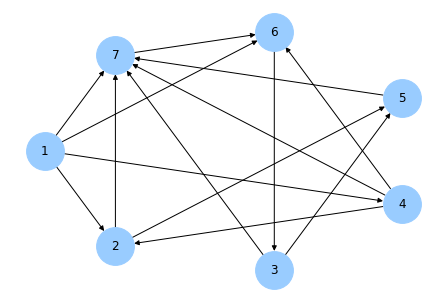

In [ ]:
norms = np.sum(A, axis=0)
norms[norms==0]=1
A = A/norms

plot_graph(A, node_color="#9cf")

In [ ]:
A

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.25      , 0.        , 0.        , 0.33333333, 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        1.        , 0.        ],
       [0.25      , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.5       , 0.5       , 0.        , 0.        ,
        0.        , 0.        ],
       [0.25      , 0.        , 0.        , 0.33333333, 0.        ,
        0.        , 1.        ],
       [0.25      , 0.5       , 0.5       , 0.33333333, 1.        ,
        0.        , 0.        ]])

First, let's compute page ranks using the iterative algorithm. The iterative algorithm scales well to huge matrices.

In [ ]:
def pagerank_iterative(A, num_iterations=100, d=0.85):
    """PageRank: The trillion dollar algorithm.

    Parameters
    ----------
    A : numpy array
        adjacency matrix where A_i,j represents the link from 'j' to 'i',
        such that for all 'j' sum(i, A_i,j) = 1
    num_iterations : int, optional
        number of iterations, by default 100
    d : float, optional
        damping factor, by default 0.85

    Returns
    -------
    numpy array
        a vector of ranks such that v_i is the i-th rank from [0, 1],
        v sums to 1

    """
    N = A.shape[1]
    v = np.random.rand(N, 1)
    v = v / np.linalg.norm(v, 1)
    for i in range(num_iterations):
        v = d * A @ v + (1 - d)/N
    return v[:,0]

In [ ]:
    np.random.rand(7, 1)


array([[0.4852239 ],
       [0.23908671],
       [0.28104399],
       [0.6875857 ],
       [0.41856625],
       [0.14146783],
       [0.90719088]])

array([0.05      , 0.07071875, 0.20118003, 0.058125  , 0.1383671 ,
       0.23258465, 0.24902447])

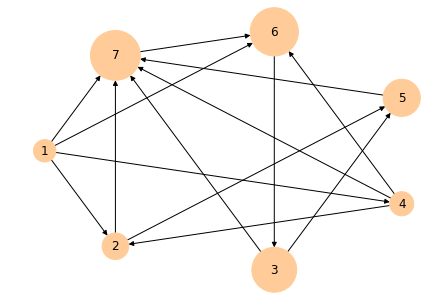

In [ ]:
vi = pagerank_iterative(A, num_iterations=100000,  d=0.65)
plot_graph(A, node_color='#fc9', node_size=vi)
vi

Now, let's do the same using the closed form matrix expression and verify that we get the same results.

In [ ]:
def pagerank_algebraic(A, d=0.85):
    """PageRank: The trillion dollar algorithm.

    Parameters
    ----------
    A : numpy array
        adjacency matrix where A_i,j represents the link from 'j' to 'i',
        such that for all 'j' sum(i, A_i,j) = 1
    d : float, optional
        damping factor, by default 0.85

    Returns
    -------
    numpy array
        a vector of ranks such that v_i is the i-th rank from [0, 1],
        v sums to 1

    """
    N = A.shape[0]
    return  la.inv(np.eye(N) - d * A) @ ((1-d)/N*np.ones(N).T)

array([-0.02857143, -0.037375  ,  0.04414168, -0.03214286,  0.00149429,
        0.03081903,  0.02163428])

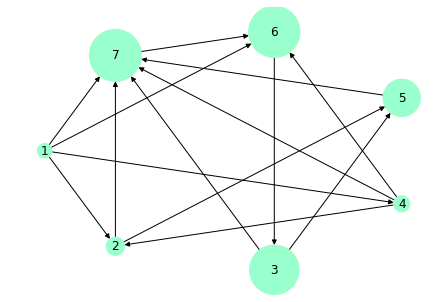

In [ ]:
va = pagerank_algebraic(A)
plot_graph(A, node_color='#9fc', node_size=va)
va-vi

In [ ]:
va - vi